In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mat
import tensorflow as tf
import cv2, os
from dbfread import DBF

import warnings
warnings.filterwarnings('ignore')

In [3]:
df1 = pd.read_csv('CAWa_CropType_polygon-info.csv')

In [4]:
df2 = pd.read_csv('CAWa_CropType_time-series.csv')

In [5]:
df1

,x,y,min.cover,max.cover,mean.cover,count
0,6.048663e+06,4.502820e+06,12.0,99.0,42.285714,7
1,6.049868e+06,4.502334e+06,4.0,95.0,36.100000,10
2,6.050470e+06,4.502450e+06,1.0,81.0,25.800000,5
3,6.050517e+06,4.502125e+06,2.0,87.0,22.857143,7
4,6.051559e+06,4.501431e+06,3.0,97.0,31.500000,10
...,...,...,...,...,...,...
8430,4.790687e+05,4.176777e+06,1.0,100.0,76.603960,101
8431,4.286480e+05,4.143126e+06,3.0,3.0,3.000000,1
8432,4.286480e+05,4.143126e+06,3.0,3.0,3.000000,1
8433,4.291280e+05,4.144041e+06,3.0,4.0,3.500000,2


x = latitude </br>
y = longitude

In [6]:
df2

,1,17,33,49,65,81,97,113,129,145,...,209,225,241,257,273,289,305,321,337,353
0,0.111308,0.054765,0.126200,0.159484,0.166125,0.194259,0.243695,0.259268,0.412404,0.343718,...,0.461741,0.514291,0.600257,0.553822,0.447369,0.348610,0.359735,0.317485,0.285898,0.216978
1,0.126651,0.090735,0.149641,0.184197,0.163872,0.220546,0.291021,0.316314,0.404704,0.367779,...,0.530132,0.589395,0.645571,0.624038,0.490106,0.378392,0.363847,0.290808,0.286735,0.220190
2,0.147239,0.137748,0.149291,0.176259,0.158478,0.173498,0.223782,0.259900,0.287752,0.323776,...,0.551144,0.611123,0.670320,0.637986,0.482977,0.332352,0.363191,0.306088,0.329455,0.267669
3,0.156130,0.155003,0.195465,0.217602,0.198143,0.195593,0.358476,0.404701,0.491424,0.510285,...,0.552242,0.567723,0.558523,0.455200,0.338860,0.324740,0.356131,0.314149,0.356384,0.304119
4,0.108603,0.087930,0.121513,0.150245,0.146230,0.147424,0.158290,0.295771,0.290800,0.308931,...,0.582848,0.631126,0.680936,0.614774,0.461521,0.343801,0.362938,0.303859,0.281202,0.229455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8430,0.164959,0.150273,0.121574,0.123627,0.142551,0.161476,0.168594,0.189300,0.200791,0.216122,...,0.561627,0.625410,0.602767,0.571561,0.537355,0.495560,0.450928,0.387159,0.314691,0.242224
8431,0.262822,0.267072,0.289850,0.382375,0.502775,0.696050,0.783781,0.780912,0.649394,0.398338,...,0.493856,0.650131,0.751269,0.724275,0.627800,0.487412,0.331212,0.239741,0.177691,0.156753
8432,0.262822,0.267072,0.289850,0.382375,0.502775,0.696050,0.783781,0.780912,0.649394,0.398338,...,0.493856,0.650131,0.751269,0.724275,0.627800,0.487412,0.331212,0.239741,0.177691,0.156753
8433,0.129361,0.134104,0.109166,0.107971,0.123699,0.169953,0.206844,0.238221,0.273846,0.229579,...,0.742532,0.679290,0.594538,0.550310,0.544938,0.504160,0.439853,0.395636,0.360550,0.325464


In [7]:
dbf = DBF('CAWa_CropType_samples.dbf')
df3 = pd.DataFrame(iter(dbf))

In [8]:
df3

,sampler,country,region,date,year,label_1,label_2,area
0,SIC-ICWC,Uzbekistan,Fergana,2011-06-14,2011,cotton,summer,159710.395957
1,SIC-ICWC,Uzbekistan,Fergana,2011-06-14,2011,cotton,summer,193109.525223
2,SIC-ICWC,Uzbekistan,Fergana,2011-06-14,2011,cotton,summer,70290.481564
3,SIC-ICWC,Uzbekistan,Fergana,2011-06-14,2011,wheat-other,double,86003.121742
4,SIC-ICWC,Uzbekistan,Fergana,2011-06-14,2011,cotton,summer,168024.789200
...,...,...,...,...,...,...,...,...
8430,SIC-ICWC,Tajikistan,Dushanbe,2016-05-21,2016,cotton,summer,69723.345853
8431,SIC-ICWC,Tajikistan,Dushanbe,2016-05-14,2016,wheat-other,double,32.121612
8432,SIC-ICWC,Tajikistan,Dushanbe,2016-05-14,2016,wheat-other,double,32.121612
8433,SIC-ICWC,Tajikistan,Dushanbe,2016-05-14,2016,cotton,summer,26.193138


In [9]:
df3 = df3.drop(["sampler"],axis=1)
df3 = df3.drop(["year"], axis = 1)

In [10]:
df3["day"] = [int(j.split("-")[2]) for j in df3.date]
df3["month"] = [int(j.split("-")[1]) for j in df3.date]
df3["year"] = [int(j.split("-")[0]) for j in df3.date]

In [11]:
df3 = df3.drop(["date"],axis=1)

In [12]:
df3

,country,region,label_1,label_2,area,day,month,year
0,Uzbekistan,Fergana,cotton,summer,159710.395957,14,6,2011
1,Uzbekistan,Fergana,cotton,summer,193109.525223,14,6,2011
2,Uzbekistan,Fergana,cotton,summer,70290.481564,14,6,2011
3,Uzbekistan,Fergana,wheat-other,double,86003.121742,14,6,2011
4,Uzbekistan,Fergana,cotton,summer,168024.789200,14,6,2011
...,...,...,...,...,...,...,...,...
8430,Tajikistan,Dushanbe,cotton,summer,69723.345853,21,5,2016
8431,Tajikistan,Dushanbe,wheat-other,double,32.121612,14,5,2016
8432,Tajikistan,Dushanbe,wheat-other,double,32.121612,14,5,2016
8433,Tajikistan,Dushanbe,cotton,summer,26.193138,14,5,2016


In [13]:
df = df1.join(df3)

In [14]:
df = df.join(df2)

In [15]:
df

,x,y,min.cover,max.cover,mean.cover,count,country,region,label_1,label_2,...,209,225,241,257,273,289,305,321,337,353
0,6.048663e+06,4.502820e+06,12.0,99.0,42.285714,7,Uzbekistan,Fergana,cotton,summer,...,0.461741,0.514291,0.600257,0.553822,0.447369,0.348610,0.359735,0.317485,0.285898,0.216978
1,6.049868e+06,4.502334e+06,4.0,95.0,36.100000,10,Uzbekistan,Fergana,cotton,summer,...,0.530132,0.589395,0.645571,0.624038,0.490106,0.378392,0.363847,0.290808,0.286735,0.220190
2,6.050470e+06,4.502450e+06,1.0,81.0,25.800000,5,Uzbekistan,Fergana,cotton,summer,...,0.551144,0.611123,0.670320,0.637986,0.482977,0.332352,0.363191,0.306088,0.329455,0.267669
3,6.050517e+06,4.502125e+06,2.0,87.0,22.857143,7,Uzbekistan,Fergana,wheat-other,double,...,0.552242,0.567723,0.558523,0.455200,0.338860,0.324740,0.356131,0.314149,0.356384,0.304119
4,6.051559e+06,4.501431e+06,3.0,97.0,31.500000,10,Uzbekistan,Fergana,cotton,summer,...,0.582848,0.631126,0.680936,0.614774,0.461521,0.343801,0.362938,0.303859,0.281202,0.229455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8430,4.790687e+05,4.176777e+06,1.0,100.0,76.603960,101,Tajikistan,Dushanbe,cotton,summer,...,0.561627,0.625410,0.602767,0.571561,0.537355,0.495560,0.450928,0.387159,0.314691,0.242224
8431,4.286480e+05,4.143126e+06,3.0,3.0,3.000000,1,Tajikistan,Dushanbe,wheat-other,double,...,0.493856,0.650131,0.751269,0.724275,0.627800,0.487412,0.331212,0.239741,0.177691,0.156753
8432,4.286480e+05,4.143126e+06,3.0,3.0,3.000000,1,Tajikistan,Dushanbe,wheat-other,double,...,0.493856,0.650131,0.751269,0.724275,0.627800,0.487412,0.331212,0.239741,0.177691,0.156753
8433,4.291280e+05,4.144041e+06,3.0,4.0,3.500000,2,Tajikistan,Dushanbe,cotton,summer,...,0.742532,0.679290,0.594538,0.550310,0.544938,0.504160,0.439853,0.395636,0.360550,0.325464


In [16]:
#Column Data type in dataframe 
df.dtypes

x             float64
y             float64
min.cover     float64
max.cover     float64
mean.cover    float64
count           int64
country        object
region         object
label_1        object
label_2        object
area          float64
day             int64
month           int64
year            int64
1             float64
17            float64
33            float64
49            float64
65            float64
81            float64
97            float64
113           float64
129           float64
145           float64
161           float64
177           float64
193           float64
209           float64
225           float64
241           float64
257           float64
273           float64
289           float64
305           float64
321           float64
337           float64
353           float64
dtype: object

In [17]:
#Statistical summary
df.describe()

,x,y,min.cover,max.cover,mean.cover,count,area,day,month,year,...,209,225,241,257,273,289,305,321,337,353
count,8.435000e+03,8.435000e+03,8435.000000,8435.000000,8435.000000,8435.000000,8435.000000,8435.000000,8435.000000,8435.000000,...,8434.000000,8432.000000,8393.000000,8394.000000,8242.000000,7270.000000,7264.000000,4614.000000,4411.000000,3977.000000
mean,5.240930e+05,4.414605e+06,1.626410,69.918803,50.700302,99.466034,73717.404257,12.611025,6.262359,2016.325311,...,0.400319,0.473429,0.510182,0.498168,0.445485,0.416358,0.310985,0.246353,0.201176,0.158725
std,9.242895e+05,1.095097e+05,2.154211,44.970209,34.231737,69.076472,55339.106546,6.402650,0.911575,1.448153,...,0.198266,0.216161,0.209838,0.190119,0.171975,0.187744,0.154085,0.126813,0.104662,0.099615
min,8.679534e+04,4.142288e+06,0.010000,0.570000,0.256000,1.000000,4.571198,1.000000,5.000000,2008.000000,...,-0.256669,-0.138451,-0.073009,-0.295070,-0.044385,-0.057497,-0.058916,-0.100104,-0.223179,-0.145664
25%,1.941633e+05,4.321529e+06,0.020000,1.000000,0.830295,51.000000,34457.638732,5.000000,6.000000,2016.000000,...,0.231365,0.272179,0.323133,0.363223,0.332418,0.277221,0.199642,0.161876,0.127268,0.081860
50%,2.756378e+05,4.425591e+06,1.000000,100.000000,69.745455,86.000000,61062.981594,15.000000,6.000000,2016.000000,...,0.385938,0.509412,0.567967,0.536816,0.464980,0.398199,0.285332,0.230442,0.186372,0.147912
75%,6.785420e+05,4.492819e+06,2.000000,100.000000,78.040892,132.000000,99281.623216,16.000000,6.000000,2018.000000,...,0.566606,0.666126,0.684280,0.640927,0.559484,0.534044,0.383096,0.302268,0.252452,0.217368
max,6.087582e+06,4.633598e+06,42.000000,100.000000,92.158273,609.000000,484506.645902,29.000000,9.000000,2018.000000,...,0.918793,0.949354,0.999239,0.997135,0.987128,0.995401,0.982097,0.898135,0.790030,0.735471


In [18]:
df.shape

(8435, 37)

### Checking Null values in Training Dataframe:

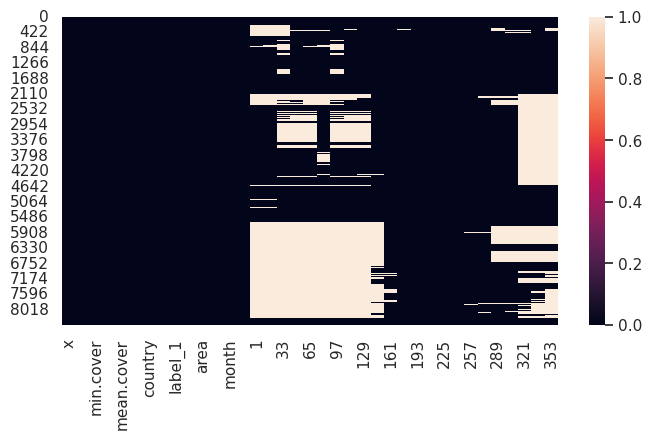

In [19]:
#Checking null values using heatmap
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(df.isnull())
plt.show()

In [20]:
#Total number of null values in complete dataset
df.isnull().sum().sum()

50018

In [21]:
#number of null values in each column
df.isnull().sum()

x                0
y                0
min.cover        0
max.cover        0
mean.cover       0
count            0
country          0
region           0
label_1          0
label_2          0
area             0
day              0
month            0
year             0
1             3322
17            3360
33            4182
49            3581
65            3737
81            3336
97            3987
113           3538
129           3504
145           2224
161            306
177             18
193              4
209              1
225              3
241             42
257             41
273            193
289           1165
305           1171
321           3821
337           4024
353           4458
dtype: int64

In [22]:
for i in df.columns:
    if (df[i].dtypes != "object"):
        df[i].fillna(df[i].mean(),inplace=True)

In [23]:
#number of null values in each column
df.isnull().sum()

x             0
y             0
min.cover     0
max.cover     0
mean.cover    0
count         0
country       0
region        0
label_1       0
label_2       0
area          0
day           0
month         0
year          0
1             0
17            0
33            0
49            0
65            0
81            0
97            0
113           0
129           0
145           0
161           0
177           0
193           0
209           0
225           0
241           0
257           0
273           0
289           0
305           0
321           0
337           0
353           0
dtype: int64

### Encoding of Both training and testing Dataframe(Converting String to numeric):

In [24]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [25]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [26]:
df.dtypes

x             float64
y             float64
min.cover     float64
max.cover     float64
mean.cover    float64
count           int64
country       float64
region        float64
label_1       float64
label_2       float64
area          float64
day             int64
month           int64
year            int64
1             float64
17            float64
33            float64
49            float64
65            float64
81            float64
97            float64
113           float64
129           float64
145           float64
161           float64
177           float64
193           float64
209           float64
225           float64
241           float64
257           float64
273           float64
289           float64
305           float64
321           float64
337           float64
353           float64
dtype: object

In [27]:
df

,x,y,min.cover,max.cover,mean.cover,count,country,region,label_1,label_2,...,209,225,241,257,273,289,305,321,337,353
0,6.048663e+06,4.502820e+06,12.0,99.0,42.285714,7,1.0,1.0,5.0,3.0,...,0.461741,0.514291,0.600257,0.553822,0.447369,0.348610,0.359735,0.317485,0.285898,0.216978
1,6.049868e+06,4.502334e+06,4.0,95.0,36.100000,10,1.0,1.0,5.0,3.0,...,0.530132,0.589395,0.645571,0.624038,0.490106,0.378392,0.363847,0.290808,0.286735,0.220190
2,6.050470e+06,4.502450e+06,1.0,81.0,25.800000,5,1.0,1.0,5.0,3.0,...,0.551144,0.611123,0.670320,0.637986,0.482977,0.332352,0.363191,0.306088,0.329455,0.267669
3,6.050517e+06,4.502125e+06,2.0,87.0,22.857143,7,1.0,1.0,35.0,0.0,...,0.552242,0.567723,0.558523,0.455200,0.338860,0.324740,0.356131,0.314149,0.356384,0.304119
4,6.051559e+06,4.501431e+06,3.0,97.0,31.500000,10,1.0,1.0,5.0,3.0,...,0.582848,0.631126,0.680936,0.614774,0.461521,0.343801,0.362938,0.303859,0.281202,0.229455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8430,4.790687e+05,4.176777e+06,1.0,100.0,76.603960,101,0.0,0.0,5.0,3.0,...,0.561627,0.625410,0.602767,0.571561,0.537355,0.495560,0.450928,0.387159,0.314691,0.242224
8431,4.286480e+05,4.143126e+06,3.0,3.0,3.000000,1,0.0,0.0,35.0,0.0,...,0.493856,0.650131,0.751269,0.724275,0.627800,0.487412,0.331212,0.239741,0.177691,0.156753
8432,4.286480e+05,4.143126e+06,3.0,3.0,3.000000,1,0.0,0.0,35.0,0.0,...,0.493856,0.650131,0.751269,0.724275,0.627800,0.487412,0.331212,0.239741,0.177691,0.156753
8433,4.291280e+05,4.144041e+06,3.0,4.0,3.500000,2,0.0,0.0,5.0,3.0,...,0.742532,0.679290,0.594538,0.550310,0.544938,0.504160,0.439853,0.395636,0.360550,0.325464


### Correlations:

<Axes: >

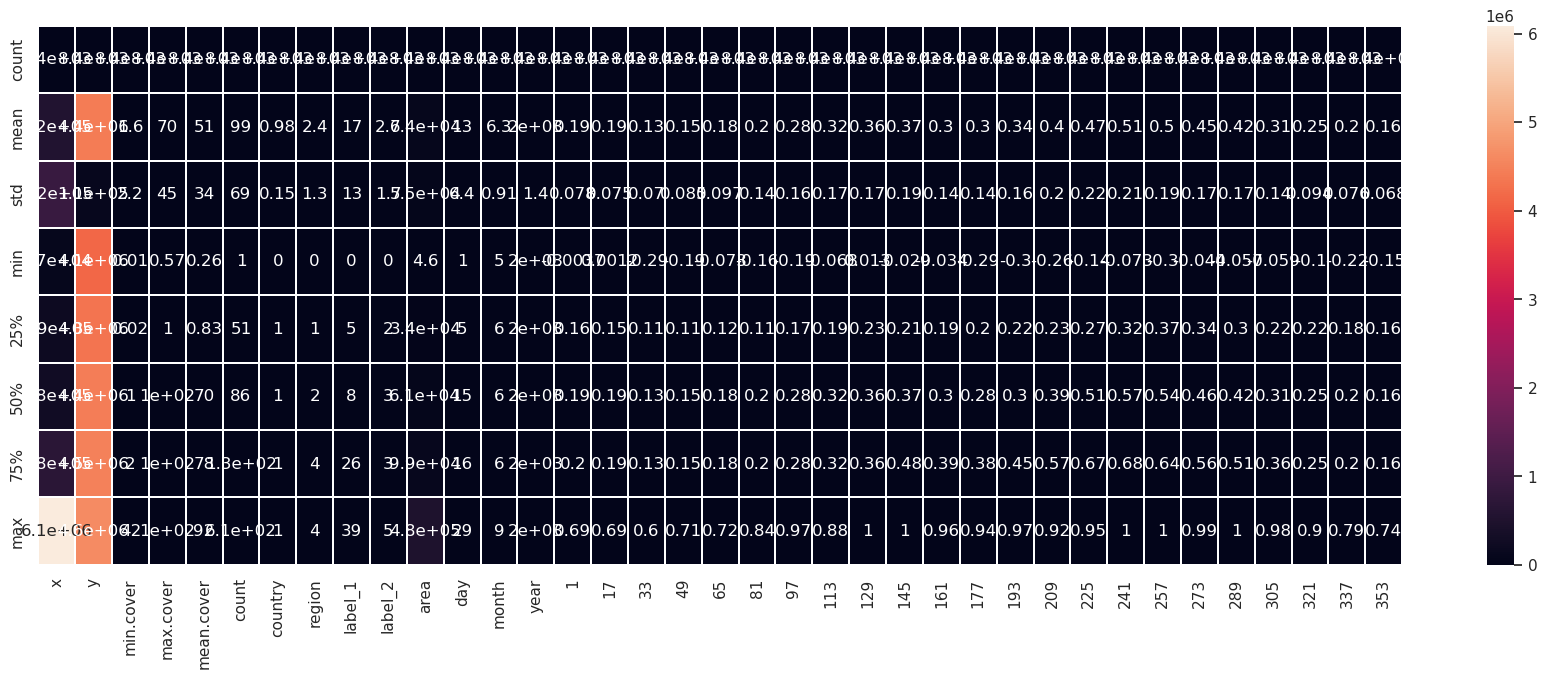

In [28]:
plt.figure(figsize = (22,7))
sns.heatmap(df.describe(),annot = True, linewidths=0.1)

In [29]:
#Correlation matrix
df.corr()

,x,y,min.cover,max.cover,mean.cover,count,country,region,label_1,label_2,...,209,225,241,257,273,289,305,321,337,353
x,1.000000,0.283894,0.264458,0.102541,-0.045703,-0.246103,0.011989,-0.362523,0.041461,-0.164203,...,0.124714,0.110640,0.138846,0.082524,0.015990,-0.093553,-0.007760,0.001885,0.031646,0.028961
y,0.283894,1.000000,0.262128,0.458839,0.433297,-0.177739,0.339787,-0.127958,0.058800,-0.361081,...,0.434910,0.432943,0.393641,0.310098,0.115348,-0.079425,0.016570,-0.017222,-0.102785,-0.224173
min.cover,0.264458,0.262128,1.000000,0.460713,0.414445,-0.224918,-0.042991,-0.135307,0.069323,-0.235372,...,0.212476,0.227783,0.226871,0.180805,0.140055,-0.033062,0.005787,-0.078802,-0.077598,-0.041680
max.cover,0.102541,0.458839,0.460713,1.000000,0.961675,-0.153267,-0.059877,0.292345,0.037313,-0.328984,...,0.382366,0.408918,0.441700,0.354193,0.246737,0.021395,0.084050,-0.004495,-0.009382,-0.012323
mean.cover,-0.045703,0.433297,0.414445,0.961675,1.000000,0.011659,0.006903,0.332423,0.028477,-0.292736,...,0.344718,0.377158,0.414492,0.337338,0.233596,0.033678,0.079058,-0.005937,-0.026370,-0.035152
count,-0.246103,-0.177739,-0.224918,-0.153267,0.011659,1.000000,0.119542,0.098423,-0.051099,0.189699,...,-0.176551,-0.176054,-0.167284,-0.128604,-0.069714,0.014245,-0.040441,0.044328,0.012561,-0.007953
country,0.011989,0.339787,-0.042991,-0.059877,0.006903,0.119542,1.000000,0.291097,-0.039236,0.088596,...,-0.115706,-0.099588,-0.069183,-0.052591,-0.063883,-0.036286,-0.086207,-0.149436,-0.179716,-0.216058
region,-0.362523,-0.127958,-0.135307,0.292345,0.332423,0.098423,0.291097,1.000000,-0.119525,0.152423,...,-0.161422,-0.139269,-0.023506,0.023803,0.056754,0.175799,0.141286,0.093316,0.116649,0.057969
label_1,0.041461,0.058800,0.069323,0.037313,0.028477,-0.051099,-0.039236,-0.119525,1.000000,-0.396361,...,-0.398628,-0.377859,-0.306847,-0.250338,-0.214440,-0.333441,-0.293133,-0.147594,-0.159933,-0.141844
label_2,-0.164203,-0.361081,-0.235372,-0.328984,-0.292736,0.189699,0.088596,0.152423,-0.396361,1.000000,...,-0.086039,-0.240249,-0.379727,-0.435005,-0.412604,-0.125320,-0.083486,0.046538,0.098471,0.133128


<Axes: >

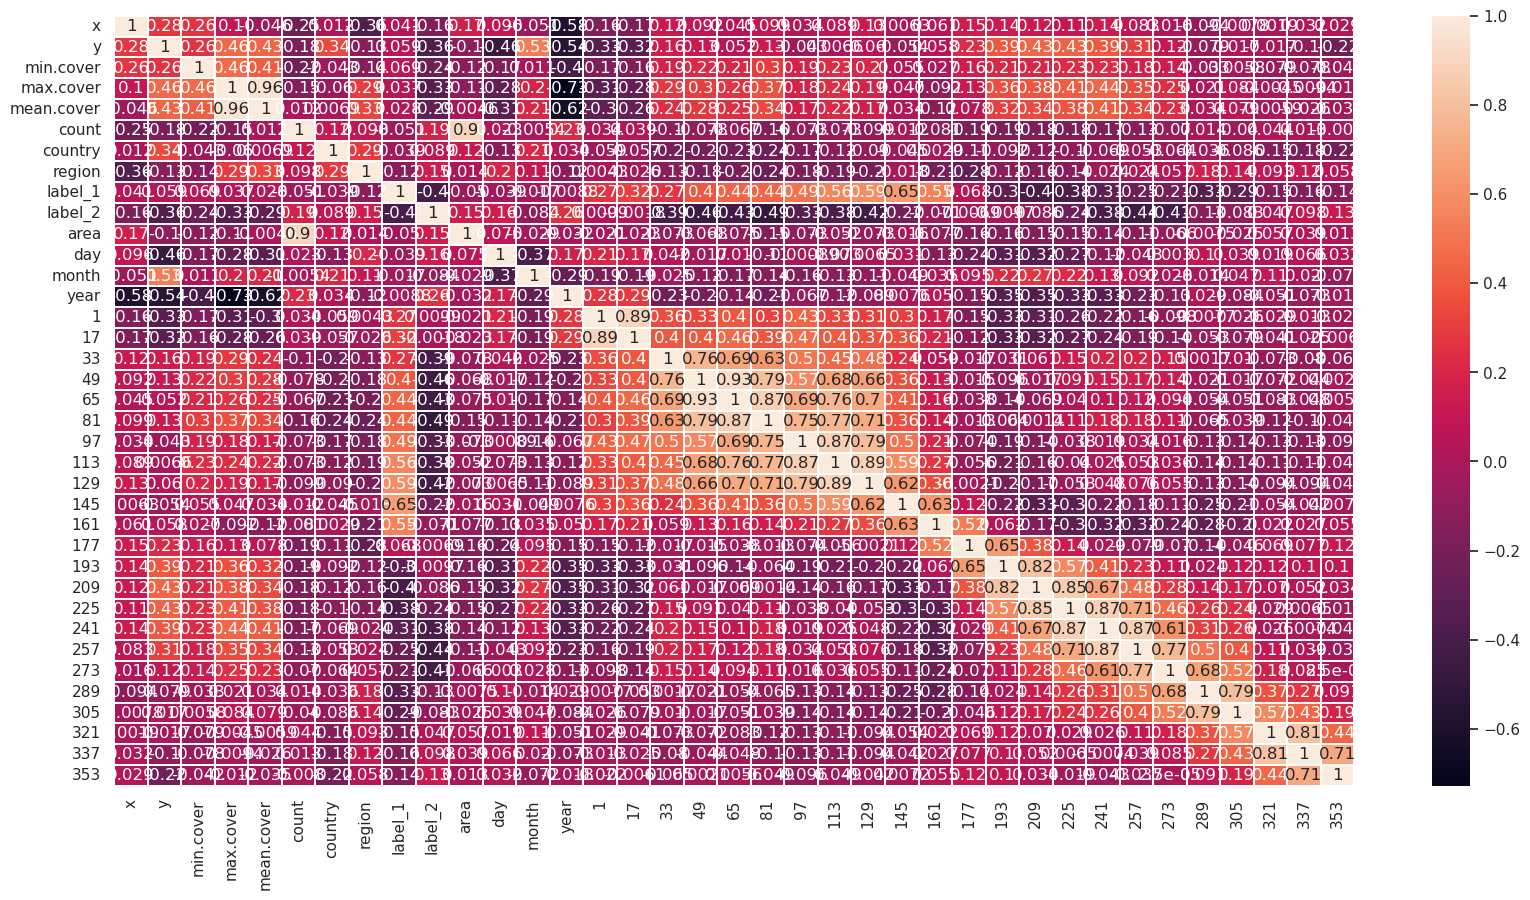

In [30]:
#Correlation of Columns with target column using heatmap
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True, linewidths=0.1)

### Checking columns which appear to be highly correlated with target columns

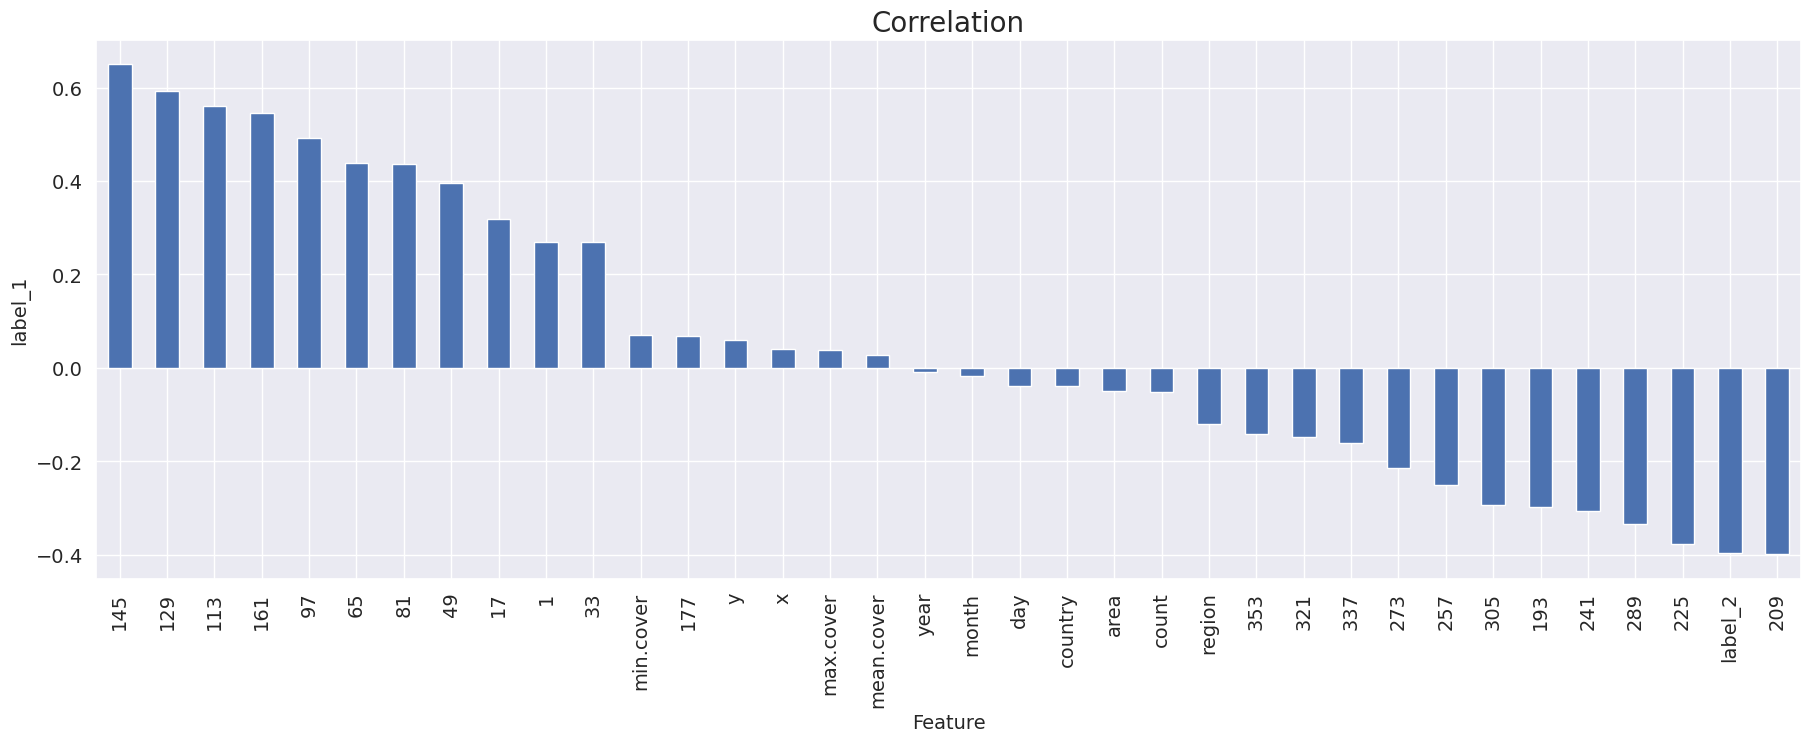

In [31]:
plt.figure(figsize=(22,7))
df.corr()['label_1'].sort_values(ascending = False).drop(['label_1']).plot(kind='bar',fontsize=14)
plt.xlabel('Feature',fontsize=14)
plt.ylabel('label_1',fontsize=14)
plt.title('Correlation',fontsize=20)
plt.show()

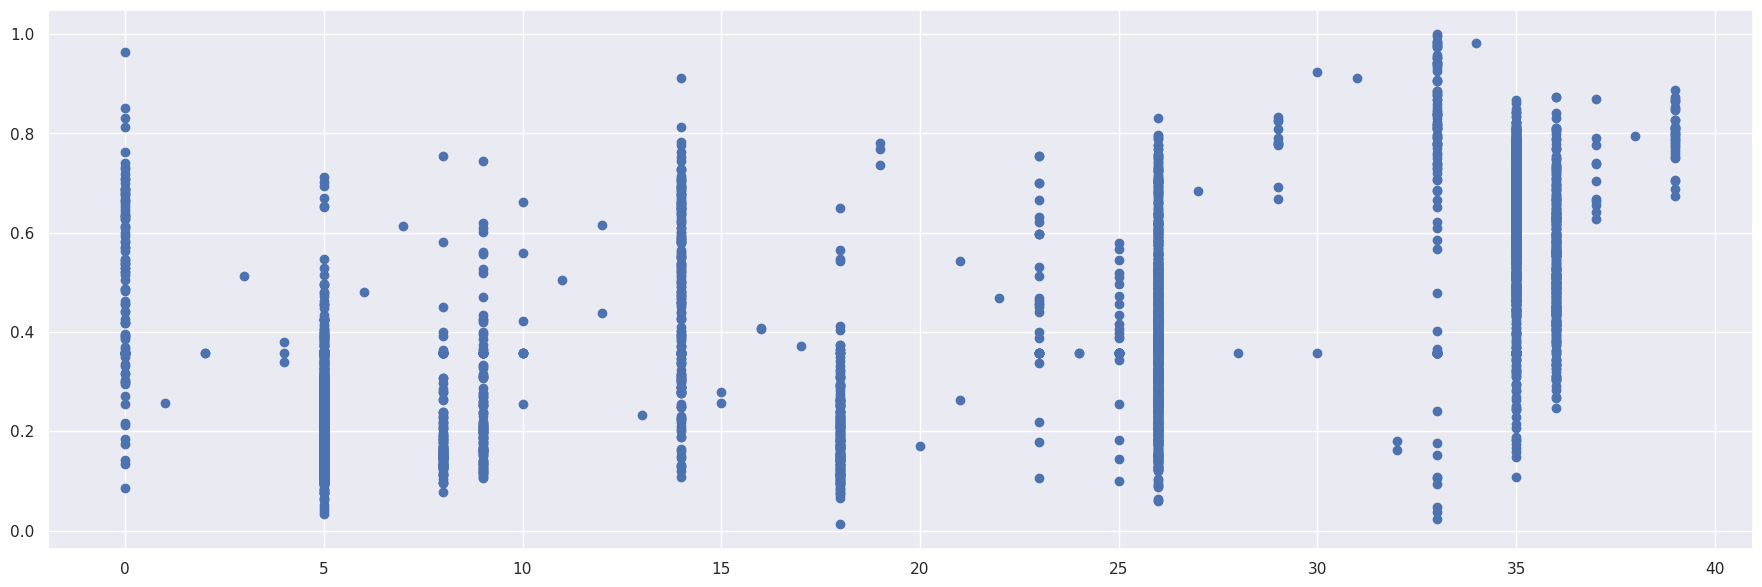

In [32]:
#Checking correlation between Price (in ₹) and Manufacturing Year
plt.figure(figsize=(22,7))
plt.scatter(df['label_1'],df['129'])
plt.show()

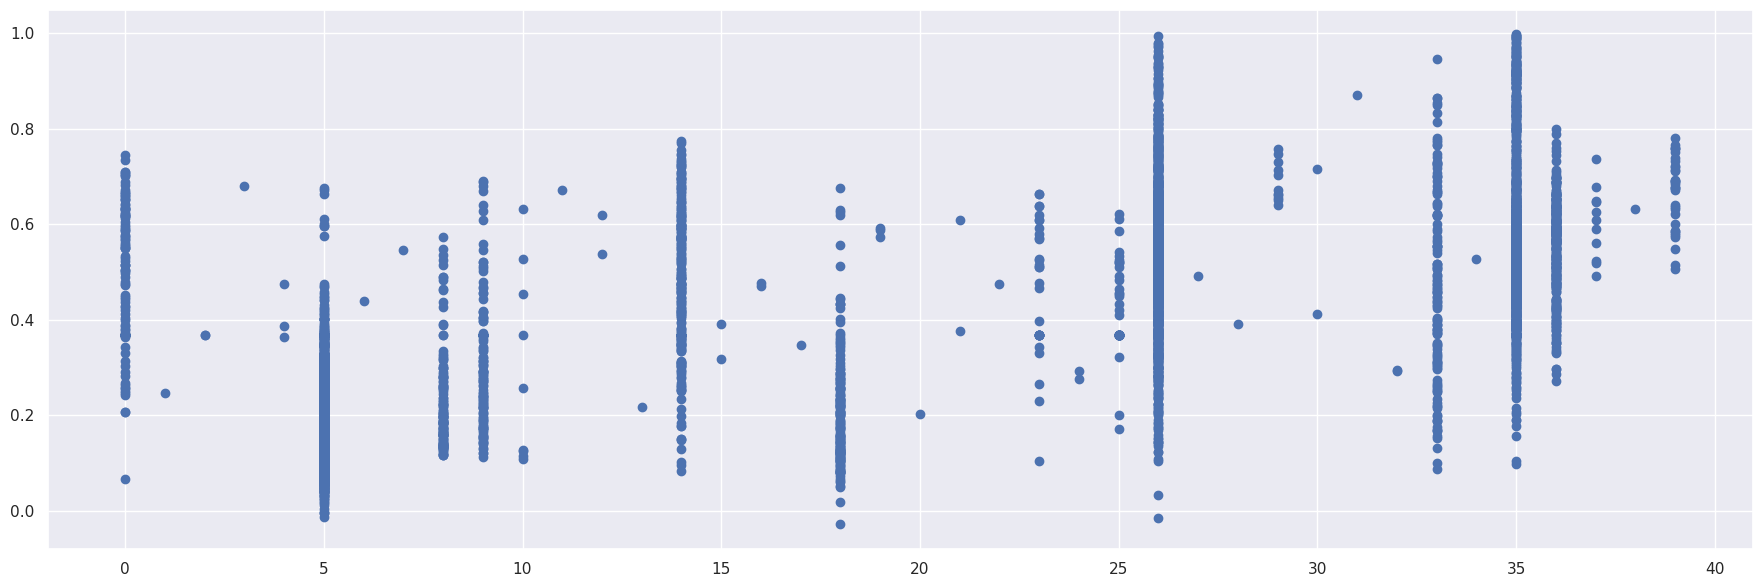

In [33]:
#Checking correlation between Price (in ₹) and Manufacturing Year
plt.figure(figsize=(22,7))
plt.scatter(df['label_1'],df['145'])
plt.show()

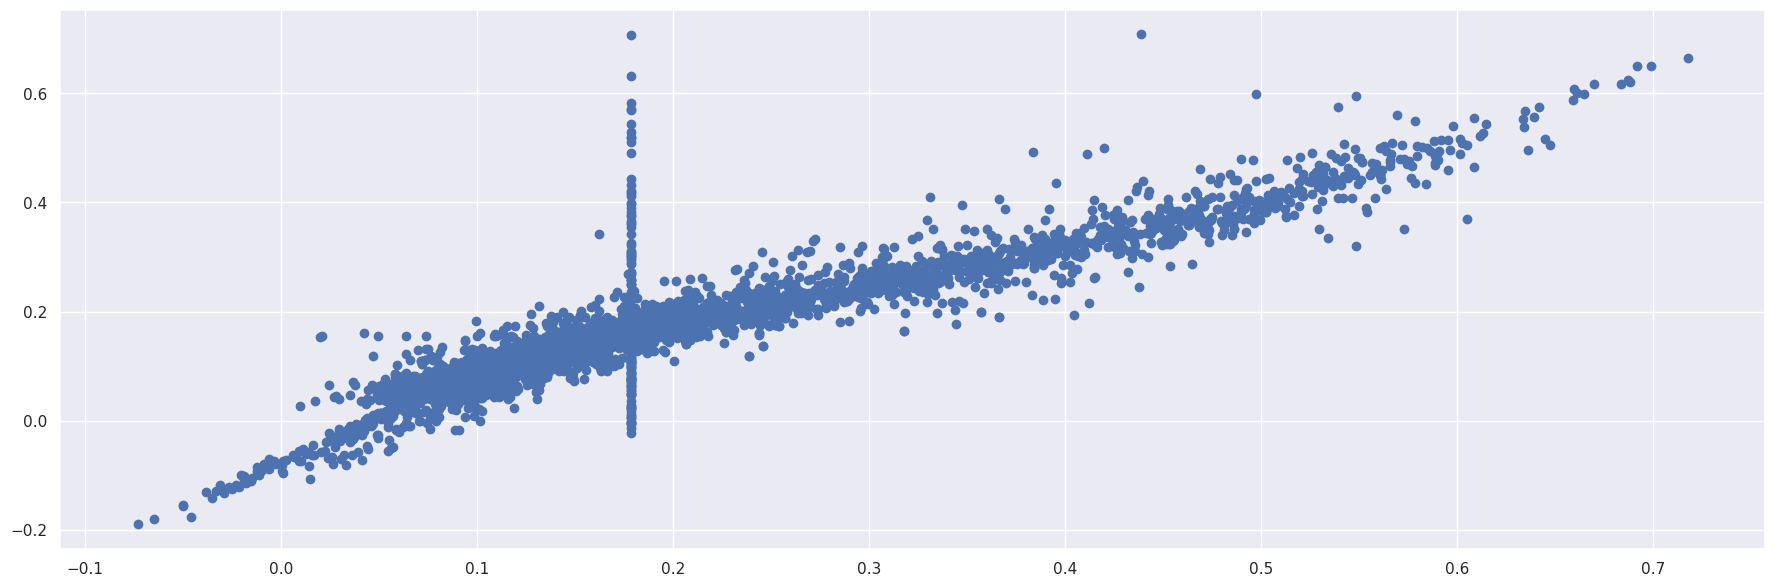

In [34]:
#Checking correlation between Price (in ₹) and Manufacturing Year
plt.figure(figsize=(22,7))
plt.scatter(df['65'],df['49'])
plt.show()

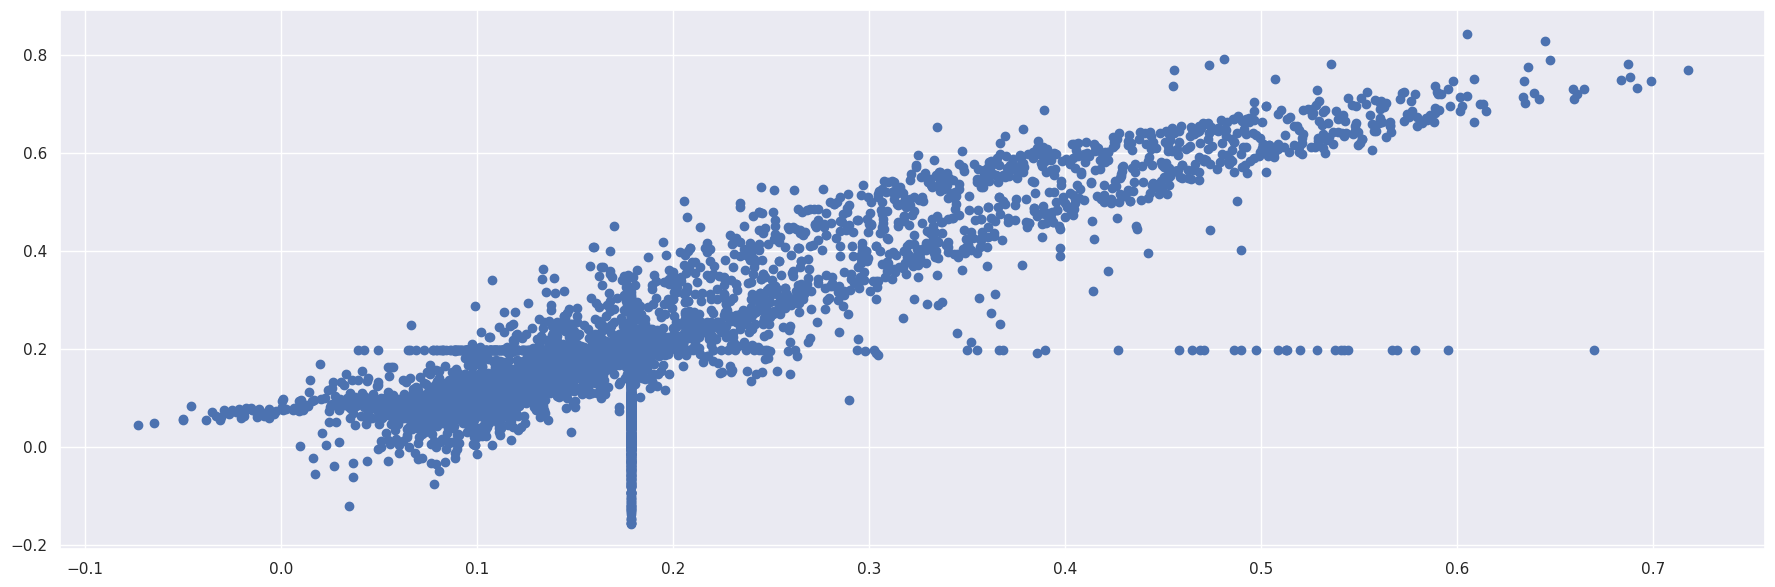

In [35]:
#Checking correlation between Price (in ₹) and Manufacturing Year
plt.figure(figsize=(22,7))
plt.scatter(df['65'],df['81'])
plt.show()

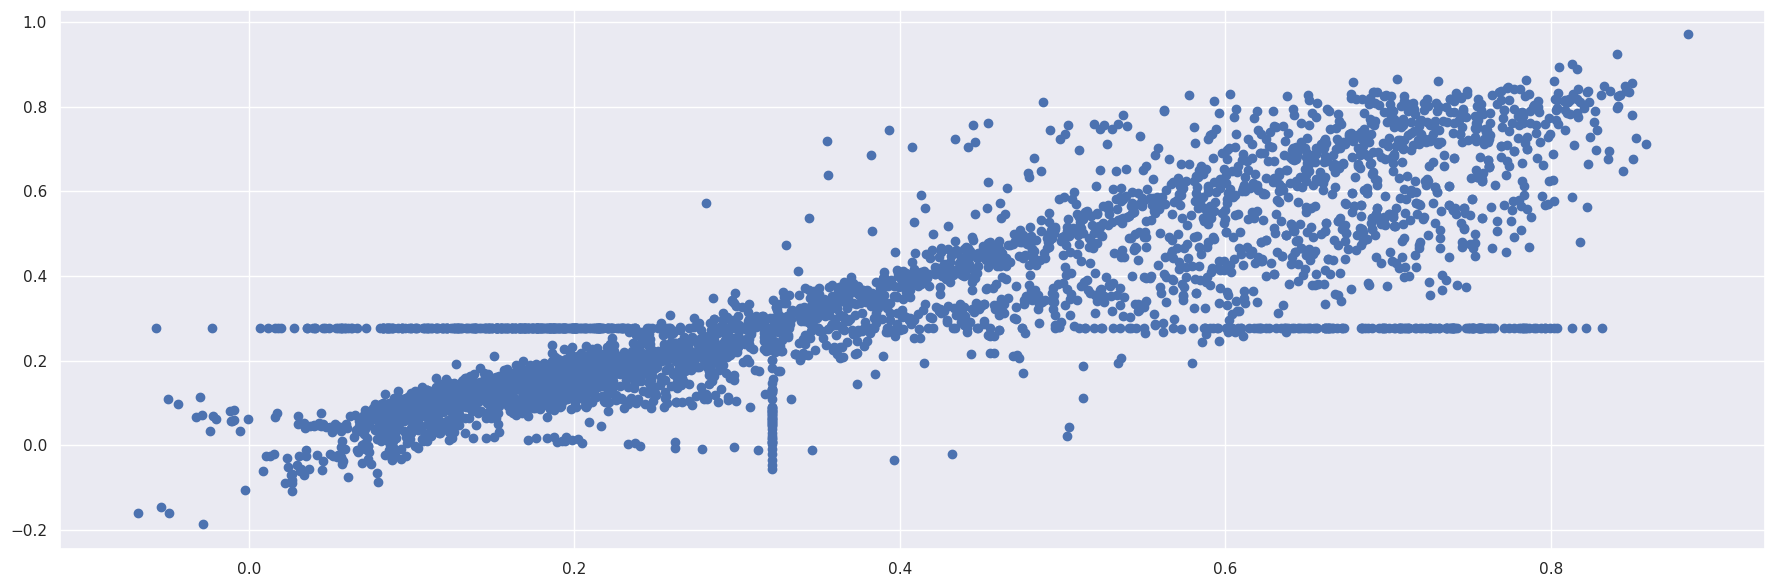

In [36]:
#Checking correlation between Price (in ₹) and Manufacturing Year
plt.figure(figsize=(22,7))
plt.scatter(df['113'],df['97'])
plt.show()

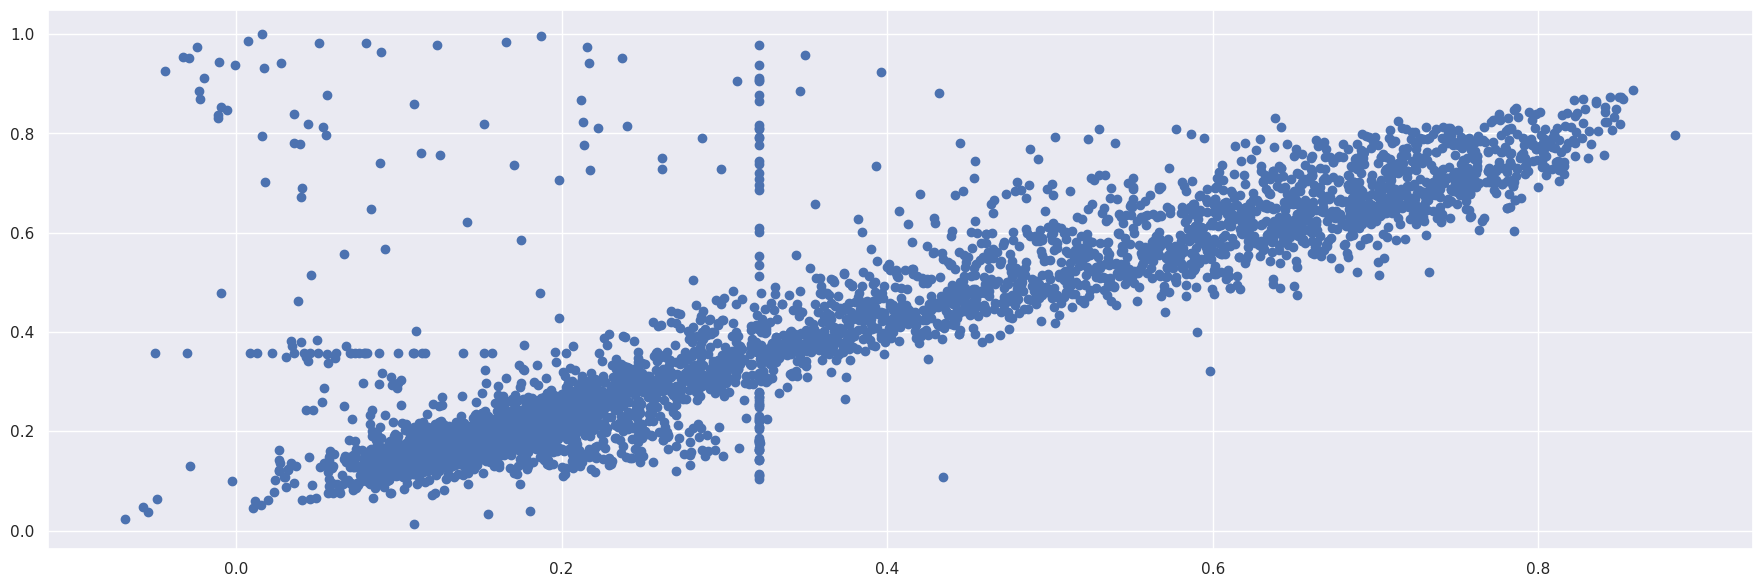

In [37]:
#Checking correlation between Price (in ₹) and Manufacturing Year
plt.figure(figsize=(22,7))
plt.scatter(df['113'],df['129'])
plt.show()

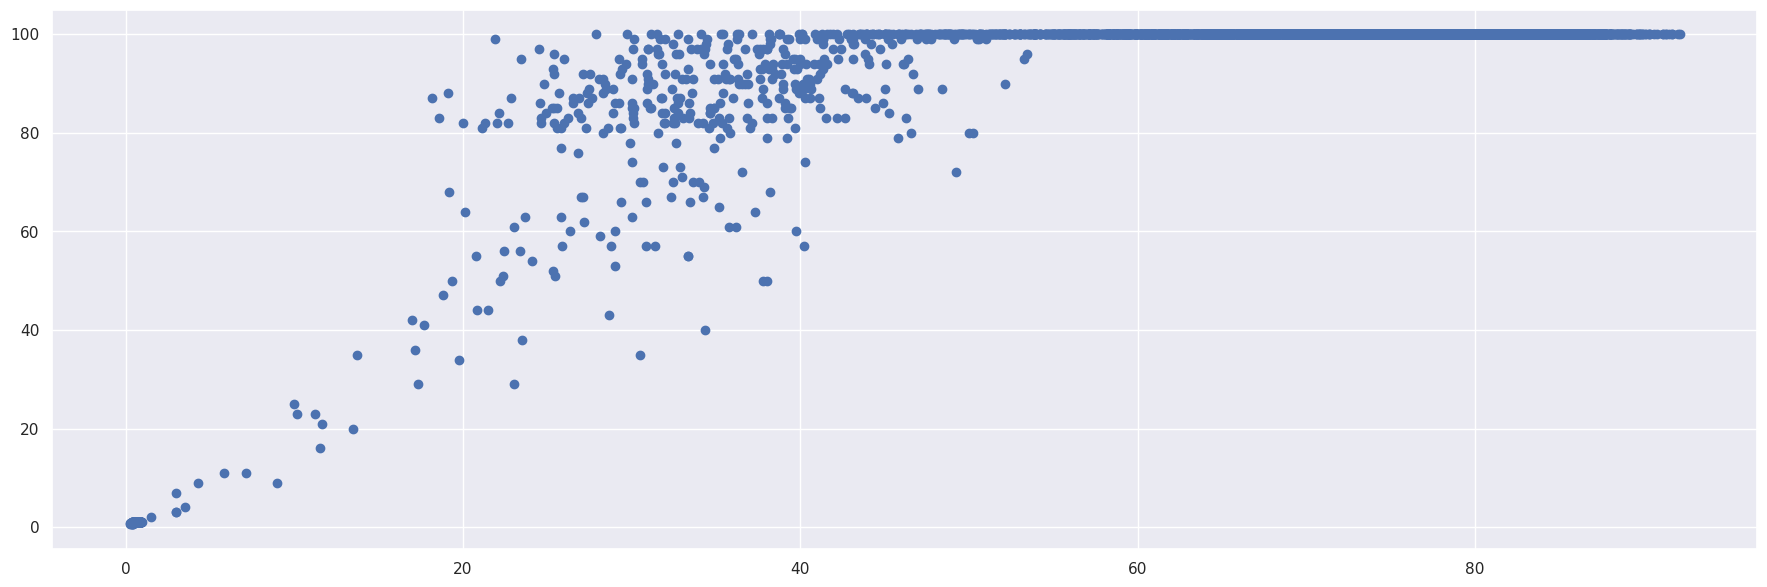

In [38]:
#Checking correlation between Price (in ₹) and Manufacturing Year
plt.figure(figsize=(22,7))
plt.scatter(df['mean.cover'],df['max.cover'])
plt.show()

### Checkin VIF for confirmation of above conclusion:

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
X1 = df[['label_1', '129']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X1.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X1.values, i)
                          for i in range(len(X1.columns))]

In [41]:
print(vif_dF)

   feature       VIF
0  label_1  4.089385
1      129  4.089385


In [42]:
X2 = df[['65','49']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X2.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]
print(vif_dF)

  feature        VIF
0      65  32.508526
1      49  32.508526


In [43]:
X3 = df[['65', '81']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X3.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X3.values, i)
                          for i in range(len(X3.columns))]

print(vif_dF)

  feature        VIF
0      65  12.398929
1      81  12.398929


In [44]:
X4 = df[['113', '97']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X4.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X4.values, i)
                          for i in range(len(X4.columns))]

print(vif_dF)

  feature        VIF
0     113  16.031623
1      97  16.031623


In [45]:
X5 = df[['113', '129']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X5.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X5.values, i)
                          for i in range(len(X5.columns))]

print(vif_dF)

  feature        VIF
0     113  20.813448
1     129  20.813448


In [46]:
X6 = df[['193', '209']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X6.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X6.values, i)
                          for i in range(len(X6.columns))]

print(vif_dF)

  feature        VIF
0     193  14.401891
1     209  14.401891


In [47]:
X7 = df[['225', '209']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X7.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X7.values, i)
                          for i in range(len(X7.columns))]

print(vif_dF)

  feature        VIF
0     225  18.326139
1     209  18.326139


In [48]:
X8 = df[['225', '241']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X8.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X8.values, i)
                          for i in range(len(X8.columns))]

print(vif_dF)

  feature       VIF
0     225  23.87404
1     241  23.87404


In [49]:
X9 = df[['257', '241']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X9.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X9.values, i)
                          for i in range(len(X9.columns))]

print(vif_dF)

  feature        VIF
0     257  27.527009
1     241  27.527009


In [50]:
X10 = df[['257', '273']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X10.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X10.values, i)
                          for i in range(len(X10.columns))]

print(vif_dF)

  feature        VIF
0     257  17.470389
1     273  17.470389


In [51]:
X11 = df[['1', '17']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X11.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X11.values, i)
                          for i in range(len(X11.columns))]

print(vif_dF)

  feature        VIF
0       1  32.339378
1      17  32.339378


In [52]:
X12 = df[['mean.cover', 'max.cover']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X12.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X12.values, i)
                          for i in range(len(X12.columns))]

print(vif_dF)

      feature        VIF
0  mean.cover  42.449353
1   max.cover  42.449353


In [53]:
X13 = df[['year', 'max.cover']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X13.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X13.values, i)
                          for i in range(len(X13.columns))]

print(vif_dF)

     feature      VIF
0       year  3.41208
1  max.cover  3.41208


#### Dropping Multi-collinear Columns

In [54]:
df = df.drop(["max.cover"],axis=1)

In [55]:
df = df.drop(df2,axis=1)
df = df.join(df2["1"])
df["1"] = df["1"].fillna(df["1"].mean())

In [56]:
df

,x,y,min.cover,mean.cover,count,country,region,label_1,label_2,area,day,month,year,1
0,6.048663e+06,4.502820e+06,12.0,42.285714,7,1.0,1.0,5.0,3.0,159710.395957,14,6,2011,0.111308
1,6.049868e+06,4.502334e+06,4.0,36.100000,10,1.0,1.0,5.0,3.0,193109.525223,14,6,2011,0.126651
2,6.050470e+06,4.502450e+06,1.0,25.800000,5,1.0,1.0,5.0,3.0,70290.481564,14,6,2011,0.147239
3,6.050517e+06,4.502125e+06,2.0,22.857143,7,1.0,1.0,35.0,0.0,86003.121742,14,6,2011,0.156130
4,6.051559e+06,4.501431e+06,3.0,31.500000,10,1.0,1.0,5.0,3.0,168024.789200,14,6,2011,0.108603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8430,4.790687e+05,4.176777e+06,1.0,76.603960,101,0.0,0.0,5.0,3.0,69723.345853,21,5,2016,0.164959
8431,4.286480e+05,4.143126e+06,3.0,3.000000,1,0.0,0.0,35.0,0.0,32.121612,14,5,2016,0.262822
8432,4.286480e+05,4.143126e+06,3.0,3.000000,1,0.0,0.0,35.0,0.0,32.121612,14,5,2016,0.262822
8433,4.291280e+05,4.144041e+06,3.0,3.500000,2,0.0,0.0,5.0,3.0,26.193138,14,5,2016,0.129361


### Removing Skewness :

In [57]:
#Checking skewness
df.skew()

x             5.344085
y             0.137657
min.cover     4.441718
mean.cover   -0.635812
count         1.552876
country      -6.455027
region        0.066957
label_1       0.370175
label_2      -0.344446
area          1.665546
day          -0.282335
month         1.291733
year         -1.505162
1             0.860733
dtype: float64

#### Acceptable skewness (-0.65,+0.65)

In [58]:
#Removing skewness from Continous columns where skewness not in (-0.65,0.65)
from scipy.stats import yeojohnson

df['min.cover'] = yeojohnson(df['min.cover'])[0]
df['area'] = yeojohnson(df['area'])[0]

In [59]:
#Checking skewness
df.skew()

x             5.344085
y             0.137657
min.cover     0.052103
mean.cover   -0.635812
count         1.552876
country      -6.455027
region        0.066957
label_1       0.370175
label_2      -0.344446
area          0.008399
day          -0.282335
month         1.291733
year         -1.505162
1             0.860733
dtype: float64

#### All continous columns (excluding target variable) are now in acceptable skew range

### Removing outliers :

x                Axes(0.125,0.712609;0.168478x0.167391)
y             Axes(0.327174,0.712609;0.168478x0.167391)
min.cover     Axes(0.529348,0.712609;0.168478x0.167391)
mean.cover    Axes(0.731522,0.712609;0.168478x0.167391)
count            Axes(0.125,0.511739;0.168478x0.167391)
country       Axes(0.327174,0.511739;0.168478x0.167391)
region        Axes(0.529348,0.511739;0.168478x0.167391)
label_1       Axes(0.731522,0.511739;0.168478x0.167391)
label_2           Axes(0.125,0.31087;0.168478x0.167391)
area           Axes(0.327174,0.31087;0.168478x0.167391)
day            Axes(0.529348,0.31087;0.168478x0.167391)
month          Axes(0.731522,0.31087;0.168478x0.167391)
year                 Axes(0.125,0.11;0.168478x0.167391)
1                 Axes(0.327174,0.11;0.168478x0.167391)
dtype: object

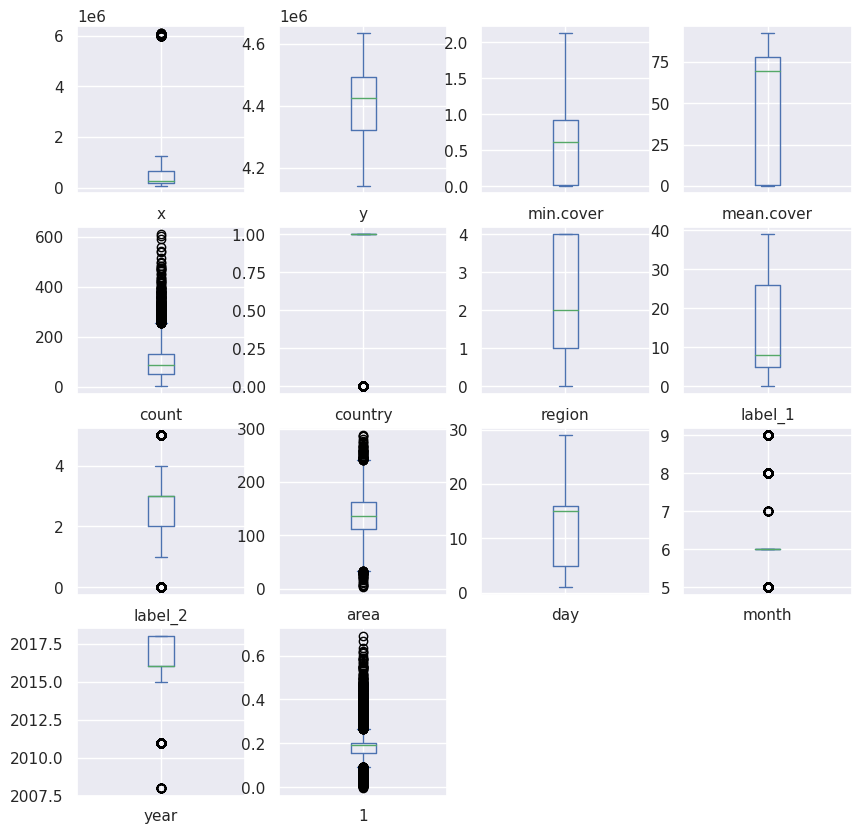

In [60]:
#Checking only for continous data types
df.plot.box(layout =(4,4),subplots=True,figsize=(10,10))

#### There looks like outliers in some columns so now we check with z-score:

### Outlier removal using z-score

In [62]:
df.shape

(8435, 14)

In [63]:
from scipy.stats import zscore

z = np.abs(zscore(df))
threshhold = 3
np.where(z>3)

(array([   0,    0,    1, ..., 8433, 8433, 8434]),
 array([ 0, 12,  0, ...,  5,  9,  5]))

In [64]:
# Number of outliers in each column
import collections

a = np.where(z>3)[1]
counter = collections.Counter(a)

counter

Counter({0: 213, 12: 239, 9: 30, 4: 123, 13: 95, 11: 163, 2: 3, 5: 189})

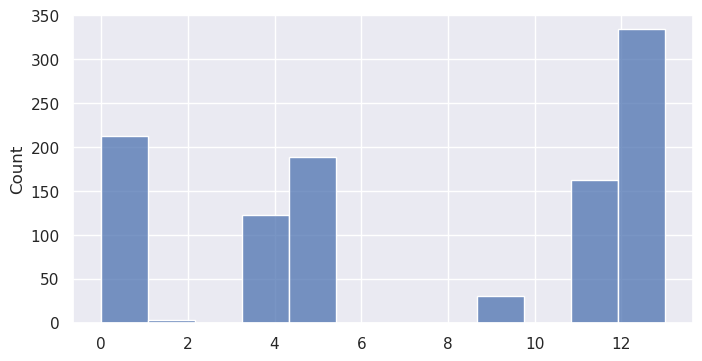

In [65]:
# Number of outliers in each column
sns.histplot(np.where(z>3)[1])
plt.show()

In [66]:
#Removing outlier from column 2 and 9 as they are the only continous data columns
df_new_z = df.copy()
df_new_z = df_new_z[(np.abs(zscore(df['min.cover'])) < 3)]
df_new_z = df_new_z[(np.abs(zscore(df['area'])) < 3)]
df_new_z

,x,y,min.cover,mean.cover,count,country,region,label_1,label_2,area,day,month,year,1
0,6.048663e+06,4.502820e+06,1.711111,42.285714,7,1.0,1.0,5.0,3.0,193.592537,14,6,2011,0.111308
1,6.049868e+06,4.502334e+06,1.239320,36.100000,10,1.0,1.0,5.0,3.0,207.252119,14,6,2011,0.126651
2,6.050470e+06,4.502450e+06,0.617480,25.800000,5,1.0,1.0,5.0,3.0,144.062642,14,6,2011,0.147239
3,6.050517e+06,4.502125e+06,0.916655,22.857143,7,1.0,1.0,35.0,0.0,154.938252,14,6,2011,0.156130
4,6.051559e+06,4.501431e+06,1.105239,31.500000,10,1.0,1.0,5.0,3.0,197.153602,14,6,2011,0.108603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8427,4.793330e+05,4.177131e+06,0.617480,20.100000,10,0.0,0.0,9.0,3.0,37.357708,21,5,2016,0.186604
8428,4.793255e+05,4.177112e+06,0.617480,32.875000,8,0.0,0.0,26.0,5.0,41.319466,21,5,2016,0.197012
8429,4.792494e+05,4.177046e+06,0.617480,61.428571,35,0.0,0.0,5.0,3.0,90.254786,21,5,2016,0.164537
8430,4.790687e+05,4.176777e+06,0.617480,76.603960,101,0.0,0.0,5.0,3.0,143.641946,21,5,2016,0.164959


In [67]:
df_new_z.shape

(8402, 14)

In [68]:
#Data Loss
Data_loss = ((8435-8402)/8435) * 100
Data_loss

0.3912270302311796

#### Now we got no outlier in continous data and data loss is only 0.39%

In [69]:
df.isnull().sum()

x             0
y             0
min.cover     0
mean.cover    0
count         0
country       0
region        0
label_1       0
label_2       0
area          0
day           0
month         0
year          0
1             0
dtype: int64

### Separating the columns into features and target for 'label_1' target variable:

In [70]:
feature = df_new_z.drop("label_1",axis=1)
target = df_new_z["label_1"]

In [71]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

### Model 1:

In [72]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [73]:
for i in range(0,10):
    features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = i)
    lr.fit(features_train,target_train)
    pred_train = lr.predict(features_train)
    pred_test = lr.predict(features_test)
    print("At random state " + str(i) + " the training accuracy is : " + str(r2_score(target_train,pred_train)))
    print("At random state " + str(i) + " the testing accuracy is : " + str(r2_score(target_test,pred_test)))
    print("\n")

At random state 0 the training accuracy is : 0.23901486696655605
At random state 0 the testing accuracy is : 0.24385505914914818


At random state 1 the training accuracy is : 0.24548442216023958
At random state 1 the testing accuracy is : 0.2186611586918744


At random state 2 the training accuracy is : 0.2455745026603109
At random state 2 the testing accuracy is : 0.2177335620834263


At random state 3 the training accuracy is : 0.2384060396925909
At random state 3 the testing accuracy is : 0.24704737104096086


At random state 4 the training accuracy is : 0.23398460365538953
At random state 4 the testing accuracy is : 0.2629585476342322


At random state 5 the training accuracy is : 0.23860486259790215
At random state 5 the testing accuracy is : 0.24660796295876208


At random state 6 the training accuracy is : 0.24667677130355903
At random state 6 the testing accuracy is : 0.21277543940644028


At random state 7 the training accuracy is : 0.24413116716215644
At random state 7 the t

In [74]:
features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = 7)

In [75]:
lr.fit(features_train,target_train)

LinearRegression()

In [76]:
pred_test = lr.predict(features_test)

In [77]:
print(r2_score(target_test,pred_test))

0.22329528261103349


### Cross Validation of model:

In [78]:
Train_accuracy = r2_score(target_train,pred_train)
Test_accuracy = r2_score(target_test,pred_test)

In [79]:
for j in range(2,10):
    cv_score = cross_val_score(lr,feature,target,cv=j)
    cv_mean = cv_score.mean()
    print("At cross fold " + str(j) + " the cv score is " + str(cv_mean) + " and accuracy score for training is " + str(Train_accuracy) + " and accuracy score for testing is " + str(Test_accuracy))
    print("\n")

At cross fold 2 the cv score is -1.0485099159030948 and accuracy score for training is -0.22677433665233382 and accuracy score for testing is 0.22329528261103349


At cross fold 3 the cv score is -1.0287362788142673 and accuracy score for training is -0.22677433665233382 and accuracy score for testing is 0.22329528261103349


At cross fold 4 the cv score is -0.34728584931201334 and accuracy score for training is -0.22677433665233382 and accuracy score for testing is 0.22329528261103349


At cross fold 5 the cv score is -0.03706912703231398 and accuracy score for training is -0.22677433665233382 and accuracy score for testing is 0.22329528261103349


At cross fold 6 the cv score is -0.1708622111616297 and accuracy score for training is -0.22677433665233382 and accuracy score for testing is 0.22329528261103349


At cross fold 7 the cv score is -0.031897642523668286 and accuracy score for training is -0.22677433665233382 and accuracy score for testing is 0.22329528261103349


At cross fol

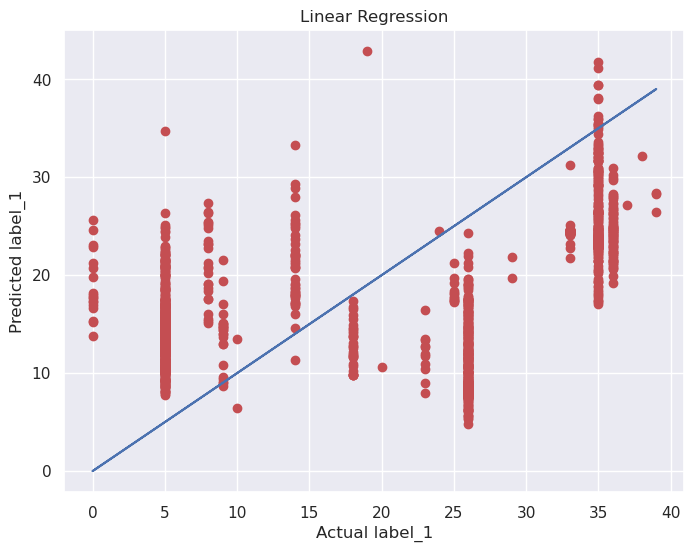

In [80]:
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test, color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual label_1')
plt.ylabel('Predicted label_1')
plt.title('Linear Regression')
plt.show()

### Trying other models:

In [81]:
def model_selection(algorithm_instance,features_train,target_train,features_test,target_test):
    algorithm_instance.fit(features_train,target_train)
    model_1_pred_train = algorithm_instance.predict(features_train)
    model_1_pred_test = algorithm_instance.predict(features_test)
    print("Accuracy for the training model : ",r2_score(target_train,model_1_pred_train))
    print("Accuracy for the testing model : ",r2_score(target_test,model_1_pred_test))
    
    Train_accuracy = r2_score(target_train,model_1_pred_train)
    Test_accuracy = r2_score(target_test,model_1_pred_test)
    
    for j in range(2,10):
        cv_score = cross_val_score(algorithm_instance,feature,target,cv=j)
        cv_mean = cv_score.mean()
        print("At cross fold " + str(j) + " the cv score is " + str(cv_mean) + " and accuracy score for training is " + str(Train_accuracy) + " and accuracy score for testing is " + str(Test_accuracy))
        print("\n")

### Model 2:

In [82]:
from sklearn.svm import SVR
model_selection(SVR(),features_train,target_train,features_test,target_test)

Accuracy for the training model :  -0.46458251593754274
Accuracy for the testing model :  -0.4831167148362674
At cross fold 2 the cv score is -0.47898428802538606 and accuracy score for training is -0.46458251593754274 and accuracy score for testing is -0.4831167148362674


At cross fold 3 the cv score is -0.5245235947679731 and accuracy score for training is -0.46458251593754274 and accuracy score for testing is -0.4831167148362674


At cross fold 4 the cv score is -0.5498549202996905 and accuracy score for training is -0.46458251593754274 and accuracy score for testing is -0.4831167148362674


At cross fold 5 the cv score is -0.46355943726495924 and accuracy score for training is -0.46458251593754274 and accuracy score for testing is -0.4831167148362674


At cross fold 6 the cv score is -0.5457382180272893 and accuracy score for training is -0.46458251593754274 and accuracy score for testing is -0.4831167148362674


At cross fold 7 the cv score is -0.5229427650060519 and accuracy sco

### Model 3:

In [83]:
from sklearn.ensemble import RandomForestRegressor
model_selection(RandomForestRegressor(),features_train,target_train,features_test,target_test)

Accuracy for the training model :  0.9959526200038465
Accuracy for the testing model :  0.9723976655115367
At cross fold 2 the cv score is 0.9398338860334721 and accuracy score for training is 0.9959526200038465 and accuracy score for testing is 0.9723976655115367


At cross fold 3 the cv score is 0.9278685683397222 and accuracy score for training is 0.9959526200038465 and accuracy score for testing is 0.9723976655115367


At cross fold 4 the cv score is 0.9361831897158032 and accuracy score for training is 0.9959526200038465 and accuracy score for testing is 0.9723976655115367


At cross fold 5 the cv score is 0.9119698407818649 and accuracy score for training is 0.9959526200038465 and accuracy score for testing is 0.9723976655115367


At cross fold 6 the cv score is 0.9419885478265533 and accuracy score for training is 0.9959526200038465 and accuracy score for testing is 0.9723976655115367


At cross fold 7 the cv score is 0.9446891708063766 and accuracy score for training is 0.99595

### Model 4:

In [84]:
from sklearn.tree import DecisionTreeRegressor
model_selection(DecisionTreeRegressor(),features_train,target_train,features_test,target_test)

Accuracy for the training model :  0.9999995518582625
Accuracy for the testing model :  0.9498563768347988
At cross fold 2 the cv score is 0.8751356372334599 and accuracy score for training is 0.9999995518582625 and accuracy score for testing is 0.9498563768347988


At cross fold 3 the cv score is 0.7739884378282786 and accuracy score for training is 0.9999995518582625 and accuracy score for testing is 0.9498563768347988


At cross fold 4 the cv score is 0.8562831895593903 and accuracy score for training is 0.9999995518582625 and accuracy score for testing is 0.9498563768347988


At cross fold 5 the cv score is 0.8562247428219623 and accuracy score for training is 0.9999995518582625 and accuracy score for testing is 0.9498563768347988


At cross fold 6 the cv score is 0.8864708175822078 and accuracy score for training is 0.9999995518582625 and accuracy score for testing is 0.9498563768347988


At cross fold 7 the cv score is 0.9270502755918282 and accuracy score for training is 0.99999

### RandomForestRegressor is giving us the Best Accuracy for the model

### Ensemble technique:

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

random_grid = {'bootstrap': [True, False],
               'max_features':randint(1,7),
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [86]:
# Use the random grid to search for best hyperparameters
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validatio searching across 100 different combinations
rf_random = RandomizedSearchCV(scoring="neg_mean_squared_error", estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(features_train,target_train)

print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'bootstrap': True, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 180}


In [93]:
rf = RandomForestRegressor(bootstrap=True, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=180)
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 score: ', abs(rfs)*100)

rfscore = cross_val_score(rf,feature,target,cv=10)
rfc =rfscore.mean()

print('Cross Validation score: ', abs(rfc)*100)

R2 score:  97.24687420439237
Cross Validation score:  93.34539926887639


### After Hyperparameter tuning we get Accuracy of 97.24687420439237%